Шаг 1. Импортируем нужные библиотеки и читаем данные

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data_songs = pd.read_csv('dataset (2).csv')

In [113]:
data_songs = pd.DataFrame(data_songs)
data_songs

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Проверим пустые значения в таблице.

In [114]:
data_songs.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Видим, что у нас всего 3 пустых значения в таблице, удалим их.

In [115]:
data_songs = data_songs.dropna()
data_songs.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [116]:
#Удаляем колонку, которая повторяет колонку индекса
data_songs = data_songs.drop(columns=['Unnamed: 0'])
data_songs

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [117]:
#Переведем значение в колонке duration_ms в минуты из миллисекунд
data_songs['duration_min'] = (data_songs['duration_ms'] / 60000).round(1)
data_songs = data_songs.drop(columns=['duration_ms'])
data_songs

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  explicit  danceability  \
0                           Comedy          73     False         0.676   
1                 Ghost - Acoustic          55     False         0.420   
2                   To Begin Again          57     False         0.438   
3       Can't Help Falling In Love          71     False         0.266   
4                          Hold On          82     False         0.618   
...                            ...         ...       ...           ...   
113995         Sleep My Little Boy          21     False         0.172   
113996            Water Into Light          22     False         0.174   
113997              Miss Perfumado          22     False         0.629   
113998                     Friends          41     False         0.587   
113999                   Barbincor          22     False         0.526   

        energy  key  loudness  mode  speechiness  acousticness  \
0       0.4610    1    -6.746     0       0.1430        0.0322   
1       0.1660    1   -17.235     1       0.0763        0.9240   
2       0.3590    0    -9.734     1       0.0557        0.2100   
3       0.0596    0   -18.515     1       0.0363        0.9050   
4       0.4430    2    -9.681     1       0.0526        0.4690   
...        ...  ...       ...   ...          ...           ...   
113995  0.2350    5   -16.393     1       0.0422        0.6400   
113996  0.1170    0   -18.318     0       0.0401        0.9940   
113997  0.3290    0   -10.895     0       0.0420        0.8670   
113998  0.5060    7   -10.889     1       0.0297        0.3810   
113999  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  duration_min  
0        

Шаг 2. Анализ датасета и проверка гипотез.

Прежде всего найдем самые популярные жанры среди пользователей

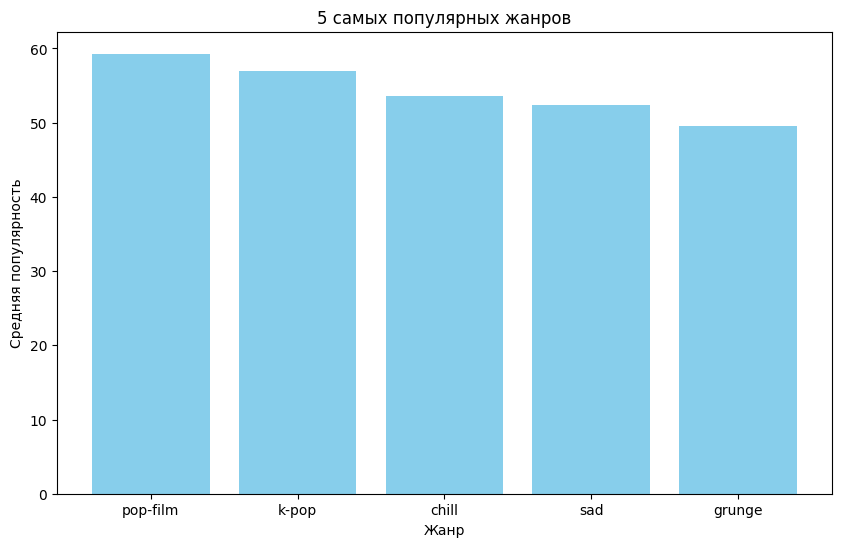

In [118]:


average_popularity_by_genre = data_songs.groupby('track_genre')['popularity'].mean().reset_index()
average_popularity_by_genre.columns = ['track_genre', 'average_popularity']

top_10_popular = average_popularity_by_genre.nlargest(5, 'average_popularity')

plt.figure(figsize=(10, 6))
plt.bar(top_10_popular['track_genre'], top_10_popular['average_popularity'], color='skyblue')

plt.title('5 самых популярных жанров')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')

plt.show()

Аналогично найдем самые менее популярные жанры

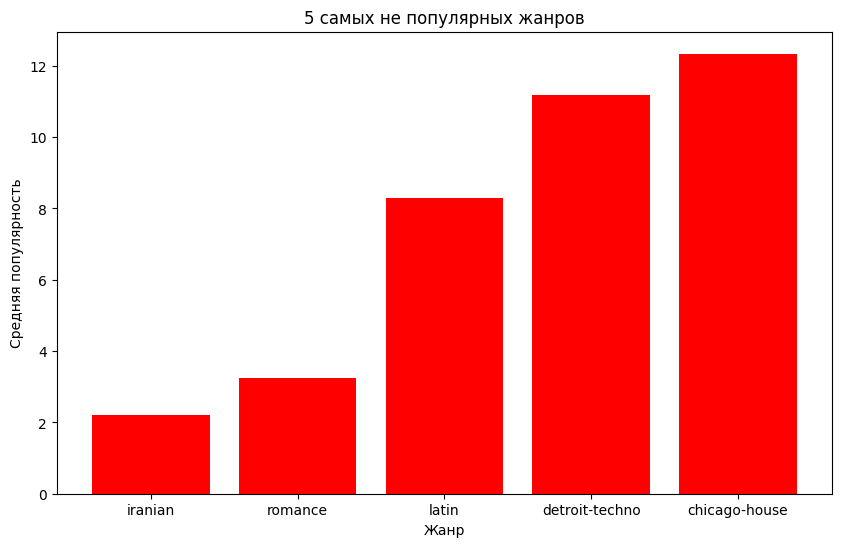

In [119]:


top_10_notpopular = average_popularity_by_genre.nsmallest(5, 'average_popularity')

plt.figure(figsize=(10, 6))
plt.bar(top_10_notpopular['track_genre'], top_10_notpopular['average_popularity'], color='red')

plt.title('5 самых не популярных жанров')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')

plt.show()

Гипотеза № 1. Оценим популярность треков по их длине, предполагаю, что слишком длинные треки не так популярны

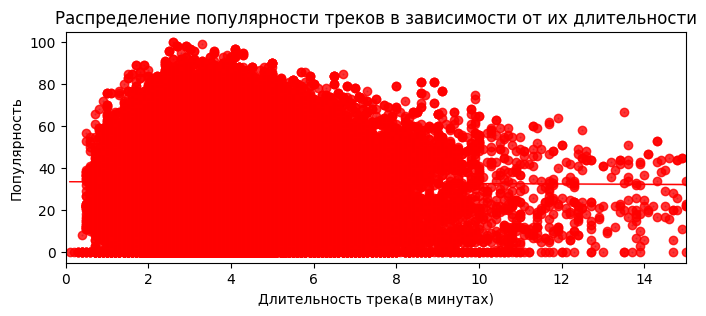

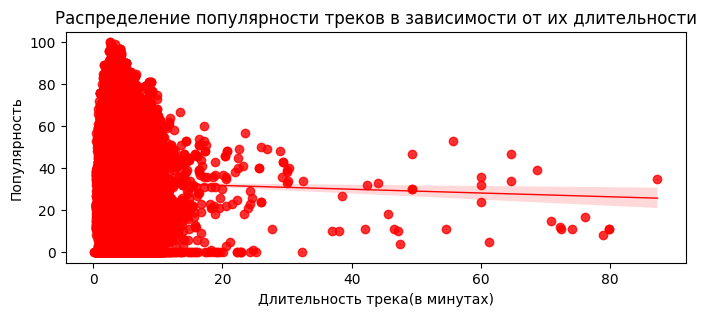

In [120]:
plt.figure(figsize=(8, 3))

sb.scatterplot(data=data_songs, x='duration_min', y='popularity', s=2, alpha=0.6)
sb.regplot(data=data_songs, x='duration_min', y='popularity', scatter='False', color='red', line_kws={'linewidth': 1})
plt.xlim(0, 15)

plt.title('Распределение популярности треков в зависимости от их длительности')
plt.xlabel('Длительность трека(в минутах)')
plt.ylabel('Популярность')
plt.show()


plt.figure(figsize=(8, 3))

sb.scatterplot(data=data_songs, x='duration_min', y='popularity', s=2, alpha=0.6)
sb.regplot(data=data_songs, x='duration_min', y='popularity', scatter='False', color='red', line_kws={'linewidth': 1})

plt.title('Распределение популярности треков в зависимости от их длительности')
plt.xlabel('Длительность трека(в минутах)')
plt.ylabel('Популярность')
plt.show()



На данном графике показано точечное распределение треков, где на параллели x значение 'длительность трека', а на параллели y соответственно его популярность

Как можно заметить, средняя популярность более долгих песен оказывается ниже.

Гипотеза №2. Предполагаю, что у артистов с большой дискографией средняя популярность треков больше.

In [121]:
data_songs['artists'].value_counts().head(10)

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

Как можно заметить среди артистов с большой дискографией в основном известные музыканты: The Beatles, Stevie Wonder, OneRepublic, Linkin Park

Количество артистов в категории "100+ песен": 41
Количество артистов в категории "50-99 песен": 148
Количество артистов в категории "10-49 песен": 2063
Количество артистов в категории "менее 10 песен": 29185
Средняя популярность артистов в категории "100+ песен": 26.27847299223824
Средняя популярность артистов в категории "50-99 песен": 29.761610544743075
Средняя популярность артистов в категории "10-49 песен": 31.110125060740135
Средняя популярность артистов в категории "менее 10 песен": 35.97250059448993


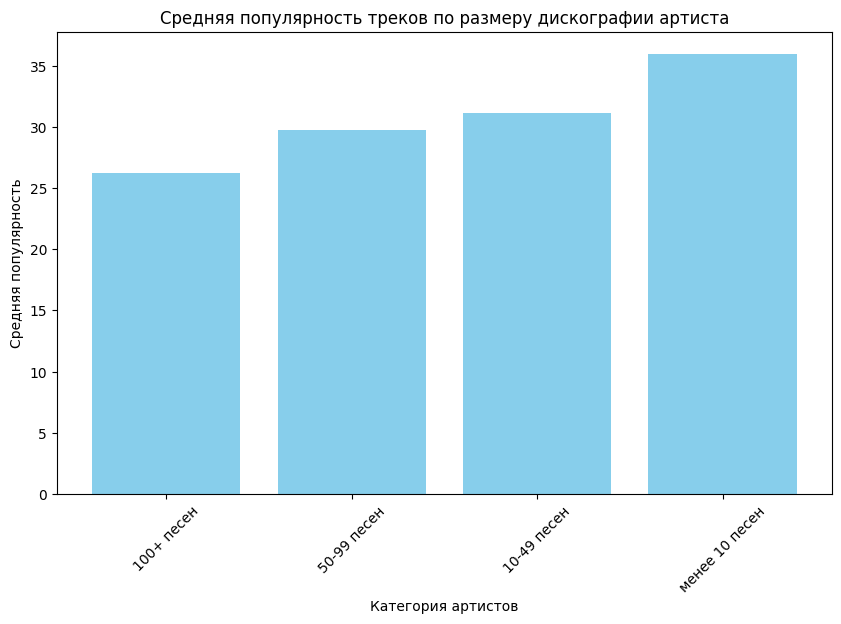

In [122]:
song_counts = data_songs.groupby('artists').size().reset_index(name='song_count')

categories = {
    '100+ песен': song_counts[song_counts['song_count'] >= 100]['artists'],
    '50-99 песен': song_counts[(song_counts['song_count'] >= 50) & (song_counts['song_count'] < 100)]['artists'],
    '10-49 песен': song_counts[(song_counts['song_count'] >= 10) & (song_counts['song_count'] < 50)]['artists'],
    'менее 10 песен': song_counts[song_counts['song_count'] < 10]['artists']
}

for category, artists in categories.items():
    print(f'Количество артистов в категории "{category}": {len(artists)}')

average_popularities = {}
for category, artists in categories.items():
    filtered_data = data_songs[data_songs['artists'].isin(artists)]
    average_popularity = filtered_data['popularity'].mean()
    average_popularities[category] = average_popularity
    print(f'Средняя популярность артистов в категории "{category}": {average_popularity}')

plt.figure(figsize=(10, 6))
plt.bar(average_popularities.keys(), average_popularities.values(), color='skyblue')

plt.title('Средняя популярность треков по размеру дискографии артиста')
plt.xlabel('Категория артистов')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45)
plt.show()

Как можно заметить средняя популярность песен у крупных музыкантов наоборот меньше, чем у музыкантов с менее обширной дискографией. Причем наблюдается тренд - категории с меньшим количеством песен в дискографии музыканта имеют большую среднюю популярность.

Гипотеза №3. Треки в альбомах со слишком большим количеством песен не так популярны, поскольку, в целом, прослушивание таких альбомов занимает очень много времени и не каждый способен выдержать такое.

In [123]:
data_songs['album_name'].value_counts().head(20)

album_name
Alternative Christmas 2022              195
Feliz Cumpleaños con Perreo             184
Metal                                   143
Halloween con perreito                  123
Halloween Party 2022                    115
The Complete Hank Williams              111
Fiesta portatil                         110
Frescura y Perreo                       106
Esto me suena a Farra                   105
Perreo en Halloween                     103
On air 70's Hits                        102
Queda poco para la PAES 2.0             101
Reggeaton Imperdible                     98
Halloween Metal Nights                   95
Homecoming Latin Party                   95
El perreo es el futuro                   94
Arbeitsmusik Herbst/Winter 2022/2023     93
Greatest Hits                            93
Hans Zimmer: Epic Scores                 91
EDM Gaming Music Autumn/Winter 2022      90
Name: count, dtype: int64

Количество альбомов в категории "Огромные альбомы": 129
Количество альбомов в категории "Большие альбомы": 377
Количество альбомов в категории "Средние альбомы": 1952
Количество альбомов в категории "Маленькие альбомы": 44131
Средняя популярность артистов в категории "Огромные альбомы": 3.938560687432868
Средняя популярность артистов в категории "Большие альбомы": 13.639569049951028
Средняя популярность артистов в категории "Средние альбомы": 35.52200030805565
Средняя популярность артистов в категории "Маленькие альбомы": 39.300320352522945


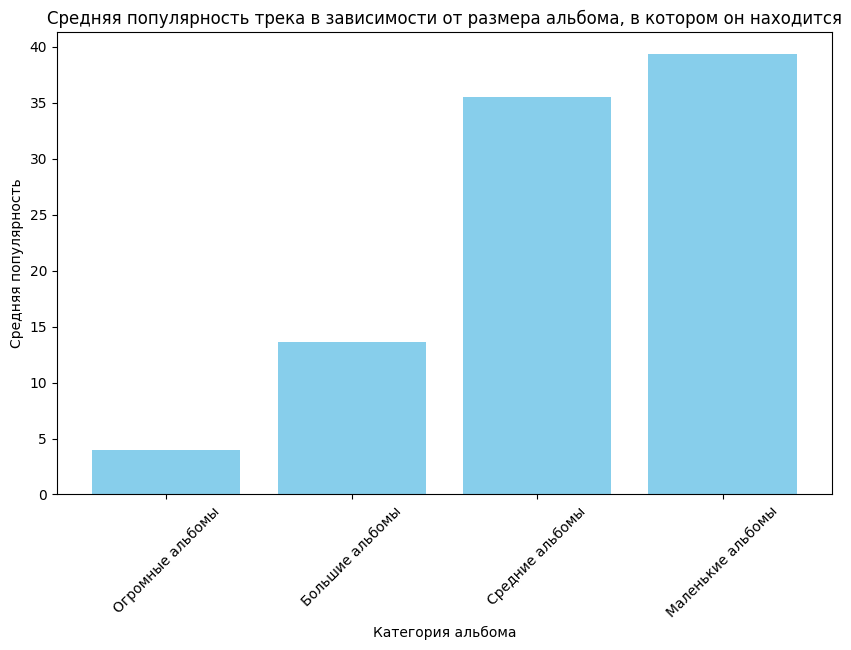

In [124]:
song_counts = data_songs.groupby('album_name').size().reset_index(name='song_count')

categories = {
    'Огромные альбомы': song_counts[song_counts['song_count'] >= 50]['album_name'],
    'Большие альбомы': song_counts[(song_counts['song_count'] >= 20) & (song_counts['song_count'] < 50)]['album_name'],
    'Средние альбомы': song_counts[(song_counts['song_count'] >= 7) & (song_counts['song_count'] < 20)]['album_name'],
    'Маленькие альбомы': song_counts[song_counts['song_count'] < 7]['album_name']
}

for category, albumes in categories.items():
    print(f'Количество альбомов в категории "{category}": {len(albumes)}')

average_popularities = {}
for category, albumes in categories.items():
    filtered_data = data_songs[data_songs['album_name'].isin(albumes)]
    average_popularity = filtered_data['popularity'].mean()
    average_popularities[category] = average_popularity
    print(f'Средняя популярность артистов в категории "{category}": {average_popularity}')

plt.figure(figsize=(10, 6))
plt.bar(average_popularities.keys(), average_popularities.values(), color='skyblue')

plt.title('Средняя популярность трека в зависимости от размера альбома, в котором он находится')
plt.xlabel('Категория альбома')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45)
plt.show()



Как можно заметить исходя из графика, слушатели действительно реже выбирают длинные альбомы для прослушивания, поэтому средняя популярность треков в них намного меньше. Самые популярные же маленькие альбомы, также наблюдается тенденция, чем больше песен в альбому, тем меньше средняя популярность песни в нем.

Гипотеза №4. Песни без explicit-контента имеют большую среднюю популярность.

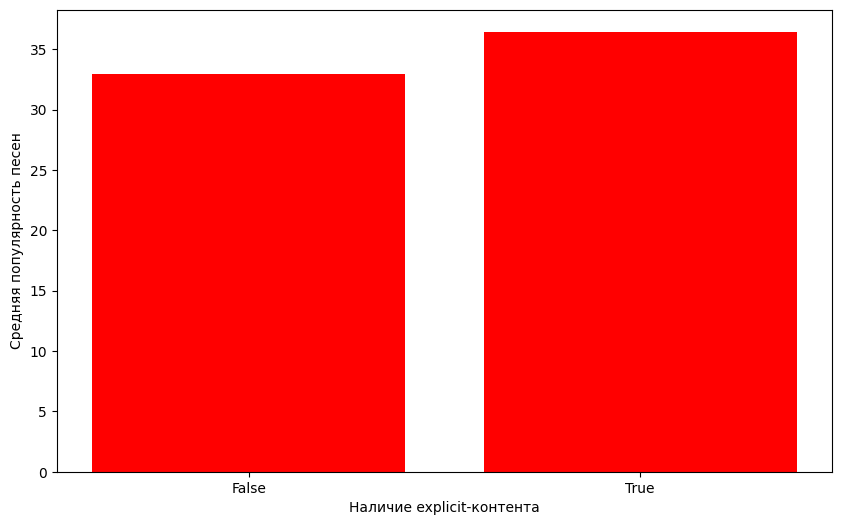

In [125]:
group_by_explicit_content = data_songs.groupby(['explicit'], as_index=False).agg({'popularity':'mean'})
group_by_explicit_content['explicit'] = group_by_explicit_content['explicit'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(group_by_explicit_content['explicit'], group_by_explicit_content['popularity'], color='red')

plt.xlabel('Наличие explicit-контента')
plt.ylabel('Средняя популярность песен')
plt.show()

Гипотеза оказалось неверной, наоборот, песни с explicit контентом в среднем чуть более популярны, чем песни без него.

Гипотеза №5. Далее проверим среднюю популярность песен, исходя из, так скажем, звуковых параметров композиции

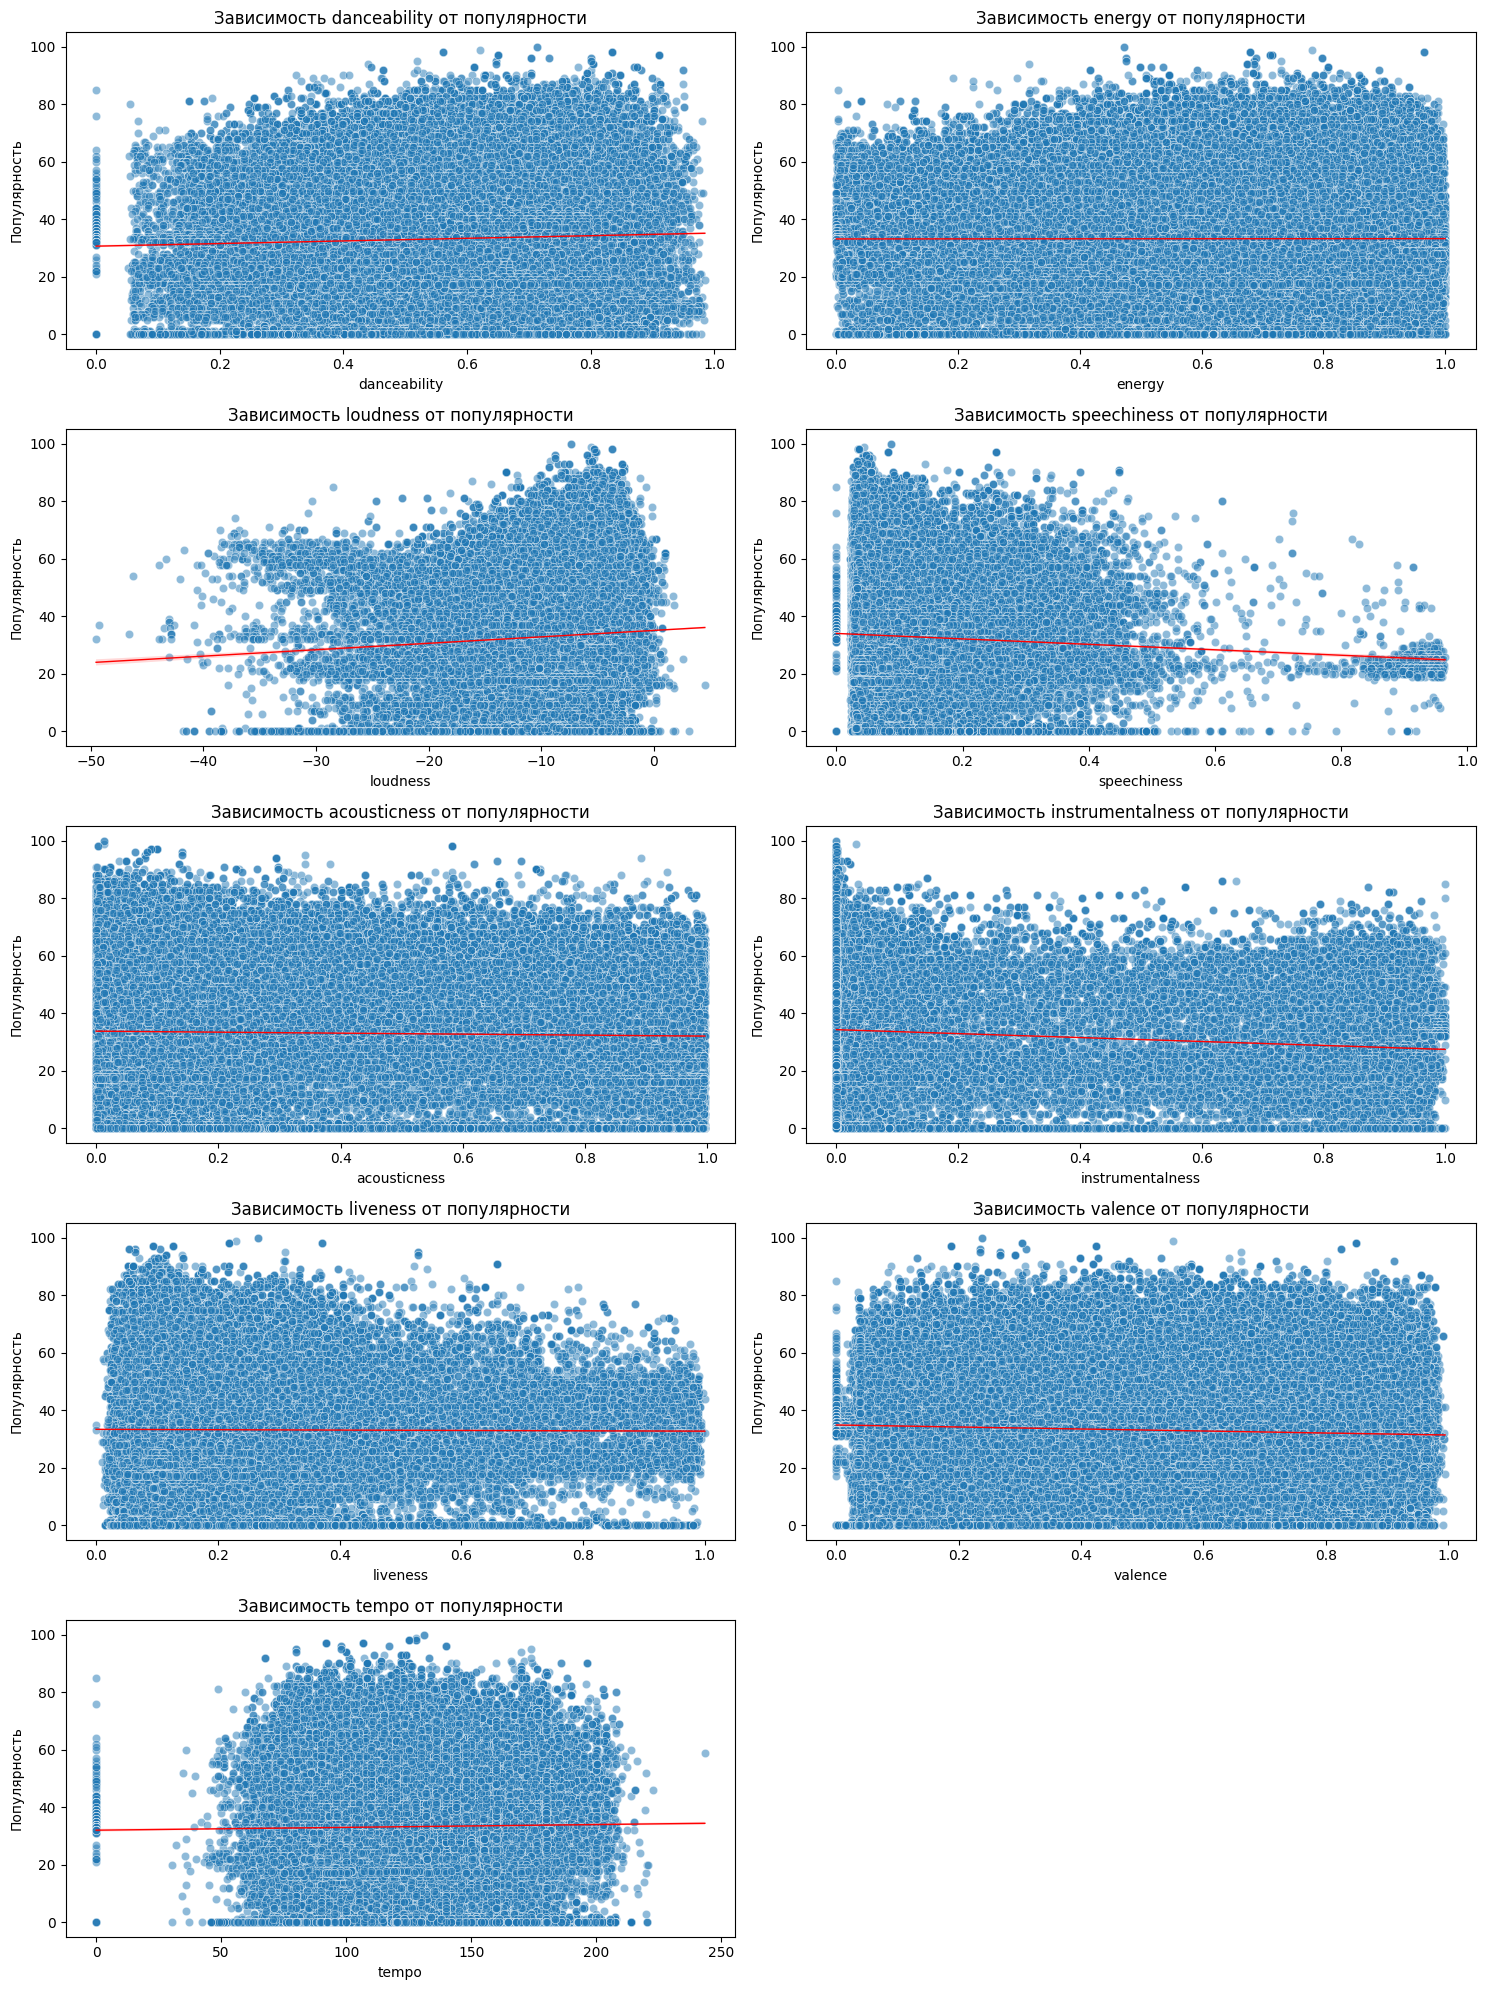

In [126]:
features = ['danceability',	'energy',  'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo']
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sb.scatterplot(data=data_songs, x=feature, y='popularity', alpha=0.5)
    sb.regplot(data=data_songs, x=feature, y='popularity', scatter=False, color='red', line_kws={'linewidth': 1})
    plt.title(f'Зависимость {feature} от популярности')
    plt.xlabel(feature)
    plt.ylabel('Популярность')

plt.tight_layout()
plt.show()

Самые сильные тенденции обнаружены на графиках с параметрами loudness(громкость), danceability(танцевальность), speechiness(красноречивость),
instrumentalness(инструментальность). 

Установим их:

    loudness: Более тихие песни, как правило менее популярны

    danceability: Песни, которые являются более танцевальными, как правило более популярны

    instrumentalness: Песни, в которых превалирует инструментальность, как правило менее популярны

    speechiness: более красноречивые песни, как правило, менее популярны


Далее проверим, насколько влиятельный признак mode, как я понимаю тональность, для параметра популярности

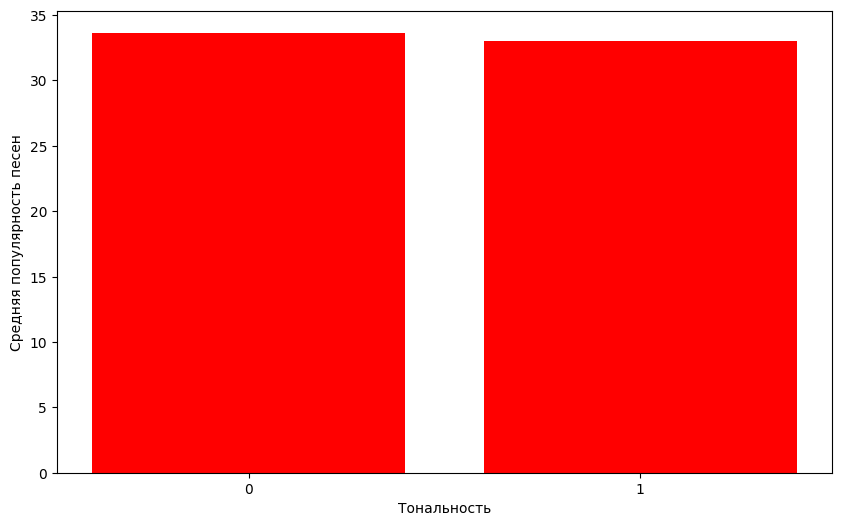

In [127]:
group_by_explicit_content = data_songs.groupby(['mode'], as_index=False).agg({'popularity':'mean'})
group_by_explicit_content['mode'] = group_by_explicit_content['mode'].astype('str')

plt.figure(figsize=(10, 6))
plt.bar(group_by_explicit_content['mode'], group_by_explicit_content['popularity'], color='red')

plt.xlabel('Тональность')
plt.ylabel('Средняя популярность песен')
plt.show()

Средняя популярность песни совсем капельку выше, с нулевой тональностью. Но разница ничтожна.

Далее проверим влияет ли параметр key на популярность

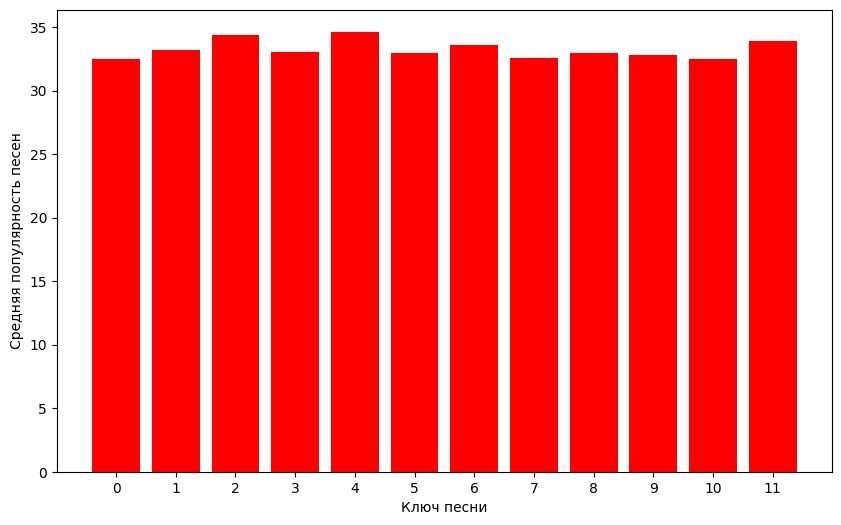

In [128]:
group_by_explicit_content = data_songs.groupby(['key'], as_index=False).agg({'popularity':'mean'})
group_by_explicit_content['key'] = group_by_explicit_content['key'].astype('str')

plt.figure(figsize=(10, 6))
plt.bar(group_by_explicit_content['key'], group_by_explicit_content['popularity'], color='red')

plt.xlabel('Ключ песни')
plt.ylabel('Средняя популярность песен')
plt.show()

Из получившегося графика нельзя установить ни одну тендецию, средняя популярность почти везде +- равная

Шаг 3. Добавим некоторые колонки в нашем датасет, исходя из анализа, приведем наш датасет к нужному нам виду.

Прежде всего, исходя из гипотиз, добавим 2 колонки в датасет:

- Количество песен у артиста, который написал ту или иную песню, в дискографии

- Количество песен в альбоме, в котором находится та или иная песня

In [129]:
album_sizes = data_songs.groupby('album_name').size()
data_songs['album_size'] = data_songs['album_name'].map(album_sizes)

artist_album_counts = data_songs.groupby('artists').size()
data_songs['artist_discography_size'] = data_songs['artists'].map(artist_album_counts)

data_songs



track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  explicit  danceability  \
0                           Comedy          73     False         0.676   
1                 Ghost - Acoustic          55     False         0.420   
2                   To Begin Again          57     False         0.438   
3       Can't Help Falling In Love          71     False         0.266   
4                          Hold On          82     False         0.618   
...                            ...         ...       ...           ...   
113995         Sleep My Little Boy          21     False         0.172   
113996            Water Into Light          22     False         0.174   
113997              Miss Perfumado          22     False         0.629   
113998                     Friends          41     False         0.587   
113999                   Barbincor          22     False         0.526   

        energy  key  loudness  ...  acousticness  instrumentalness  liveness  \
0       0.4610    1    -6.746  ...        0.0322          0.000001    0.3580   
1       0.1660    1   -17.235  ...        0.9240          0.000006    0.1010   
2       0.3590    0    -9.734  ...        0.2100          0.000000    0.1170   
3       0.0596    0   -18.515  ...        0.9050          0.000071    0.1320   
4       0.4430    2    -9.681  ...        0.4690          0.000000    0.0829   
...        ...  ...       ...  ...           ...               ...       ...   
113995  0.2350    5   -16.393  ...        0.6400          0.928000    0.0863   
113996  0.1170    0   -18.318  ...        0.9940          0.976000    0.1050   
113997  0.3290    0   -10.895  ...        0.8670          0.000000    0.0839   
113998  0.5060    7   -10.889  ...        0.3810          0.000000    0.2700   
113999  0.4870    1   -10.204  ...        0.6810          0.000000    0.0893   

        valence    tempo  time_signature  track_genre  duration_min  \
0        0.7150   87.917               4     acoustic           3.8   
1        0.2670   77.489               4     acoustic           2.5   
2        0.1200   76.332               4     acoustic           3.5   
3        0.1430  181.740               3     acoustic           3.4   
4        0.1670  119.949               4     acoustic           3.3   
...         ...      ...             ...          ...           ...   
113995   0.0339  125.995               5  world-music           6.4   
113996   0.0350   85.239               4  world-music           6.4   
113997   0.7430  132.378               4  world-music           4.5   
113998   0.4130  135.960        

Далее с помощью LabelEncoder'a избавимся от типа object в нашем датасете.

In [130]:
from sklearn.preprocessing import LabelEncoder
categories = data_songs.select_dtypes(include=('object')).columns
for col in categories:
    data_songs[col] = LabelEncoder().fit_transform(data_songs[col])

data_songs.dtypes
data_songs

track_id  artists  album_name  track_name  popularity  explicit  \
0          62845    10357        8100       11741          73     False   
1          55667     3287       14796       22528          55     False   
2          19766    12397       39162       60774          57     False   
3          77941    14839        8580        9580          71     False   
4          68241     5255       16899       25689          82     False   
...          ...      ...         ...         ...         ...       ...   
113995     25198    22486          66       53329          21     False   
113996     19583    22486          66       65090          22     False   
113997     80126     4952        5028       38207          22     False   
113998     30455    18534        7238       21507          41     False   
113999     31077     4952       24357        5999          22     False   

        danceability  energy  key  loudness  ...  acousticness  \
0              0.676  0.4610    1    -6.746  ...        0.0322   
1              0.420  0.1660    1   -17.235  ...        0.9240   
2              0.438  0.3590    0    -9.734  ...        0.2100   
3              0.266  0.0596    0   -18.515  ...        0.9050   
4              0.618  0.4430    2    -9.681  ...        0.4690   
...              ...     ...  ...       ...  ...           ...   
113995         0.172  0.2350    5   -16.393  ...        0.6400   
113996         0.174  0.1170    0   -18.318  ...        0.9940   
113997         0.629  0.3290    0   -10.895  ...        0.8670   
113998         0.587  0.5060    7   -10.889  ...        0.3810   
113999         0.526  0.4870    1   -10.204  ...        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  duration_min  album_size  artist_discography_size  
0                 0           3.8           4                       10  
1                 0           2.5           2                       13  
2                 0           3.5           1                        1  
3                 0           3.4           1                       15  
4                 0           3.3           6                       11  
...             ...           ...         ...                      ...  
113995          113           6.4           4                        4  
113996          113           6.4           4                        4  
113997          113           4.5          26                       14  
113998          113           4.7           2                       30  
113999          113           4.0           2                       14  

[113999 rows x 22 columns]

Глянем корреляцию

<Axes: >

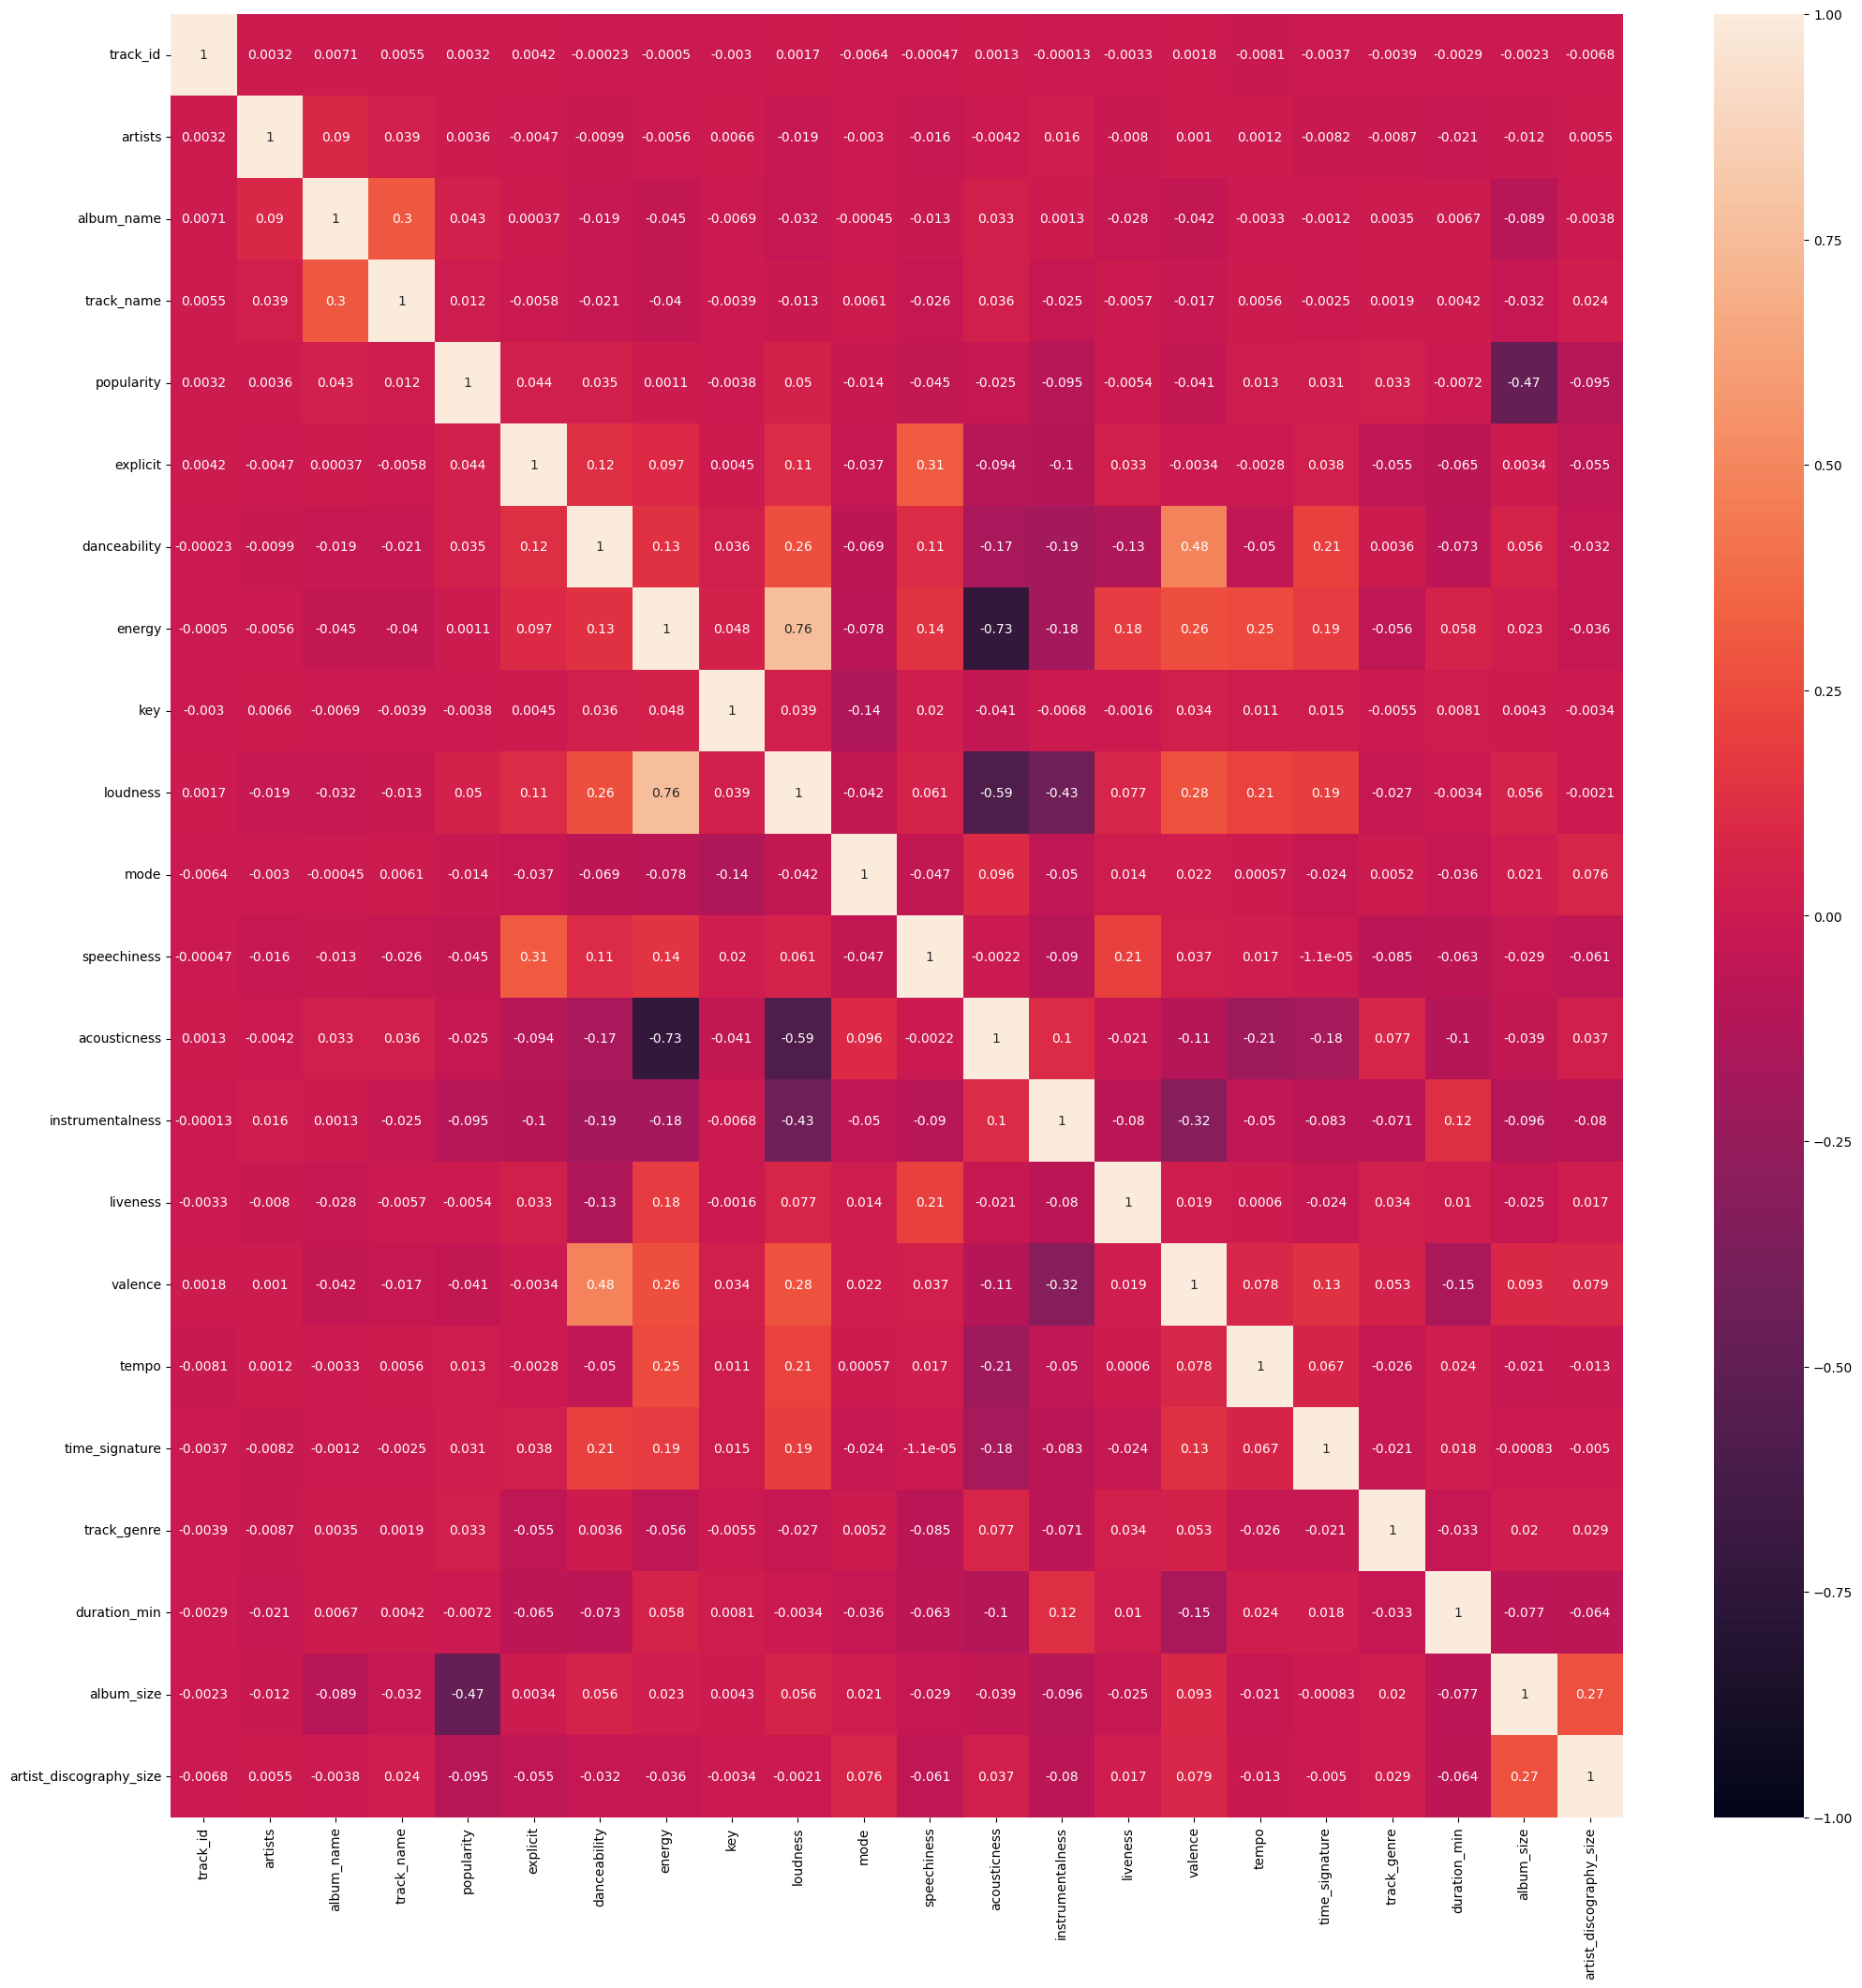

In [131]:
fig, ax = plt.subplots(figsize=(25,25))
sb.heatmap(data_songs.corr(), annot=True, vmin=-1, vmax=1, ax=ax)

Что можно сказать по поводу данной корреляции?

Прежде всего, заметим насколько сильно коррелируют между собой loudness и energy, совместим две колонки в одну перемножив значения.

Также колонка album_size имеет сильную отрицательную корреляцию с колонкой popularity, это свидетельствует о тенденции, которую мы установили при анализе. Чем меньше размер альбома, тем выше средняя популярность трека в нем.
    

In [132]:
data_songs['energy'] = data_songs['energy'] * data_songs['loudness']
data_songs = data_songs.drop(['loudness'], axis=1)
data_songs

track_id  artists  album_name  track_name  popularity  explicit  \
0          62845    10357        8100       11741          73     False   
1          55667     3287       14796       22528          55     False   
2          19766    12397       39162       60774          57     False   
3          77941    14839        8580        9580          71     False   
4          68241     5255       16899       25689          82     False   
...          ...      ...         ...         ...         ...       ...   
113995     25198    22486          66       53329          21     False   
113996     19583    22486          66       65090          22     False   
113997     80126     4952        5028       38207          22     False   
113998     30455    18534        7238       21507          41     False   
113999     31077     4952       24357        5999          22     False   

        danceability    energy  key  mode  ...  acousticness  \
0              0.676 -3.109906    1     0  ...        0.0322   
1              0.420 -2.861010    1     1  ...        0.9240   
2              0.438 -3.494506    0     1  ...        0.2100   
3              0.266 -1.103494    0     1  ...        0.9050   
4              0.618 -4.288683    2     1  ...        0.4690   
...              ...       ...  ...   ...  ...           ...   
113995         0.172 -3.852355    5     1  ...        0.6400   
113996         0.174 -2.143206    0     0  ...        0.9940   
113997         0.629 -3.584455    0     0  ...        0.8670   
113998         0.587 -5.509834    7     1  ...        0.3810   
113999         0.526 -4.969348    1     0  ...        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  duration_min  album_size  artist_discography_size  
0                 0           3.8           4                       10  
1                 0           2.5           2                       13  
2                 0           3.5           1                        1  
3                 0           3.4           1                       15  
4                 0           3.3           6                       11  
...             ...           ...         ...                      ...  
113995          113           6.4           4                        4  
113996          113           6.4           4                        4  
113997          113           4.5          26                       14  
113998          113           4.7           2                       30  
113999          113           4.0           2                       14  

[113999 rows x 21 columns]

Шаг 4. Выбор модели

Разбиваем датасет на тренировочную и тестовую выборку.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_songs.drop('popularity', axis=1)
y = data_songs['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)


4.1 Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

rfregr = RandomForestRegressor()
rfregr.fit(X_train, y_train)

rfr_score = rfregr.score(X_test, y_test)
print(f"Точность модели: {rfr_score:.2f}")


Точность модели: 0.77


Получили относительно неплохую точность. Теперь посмотрим карту важности признаков

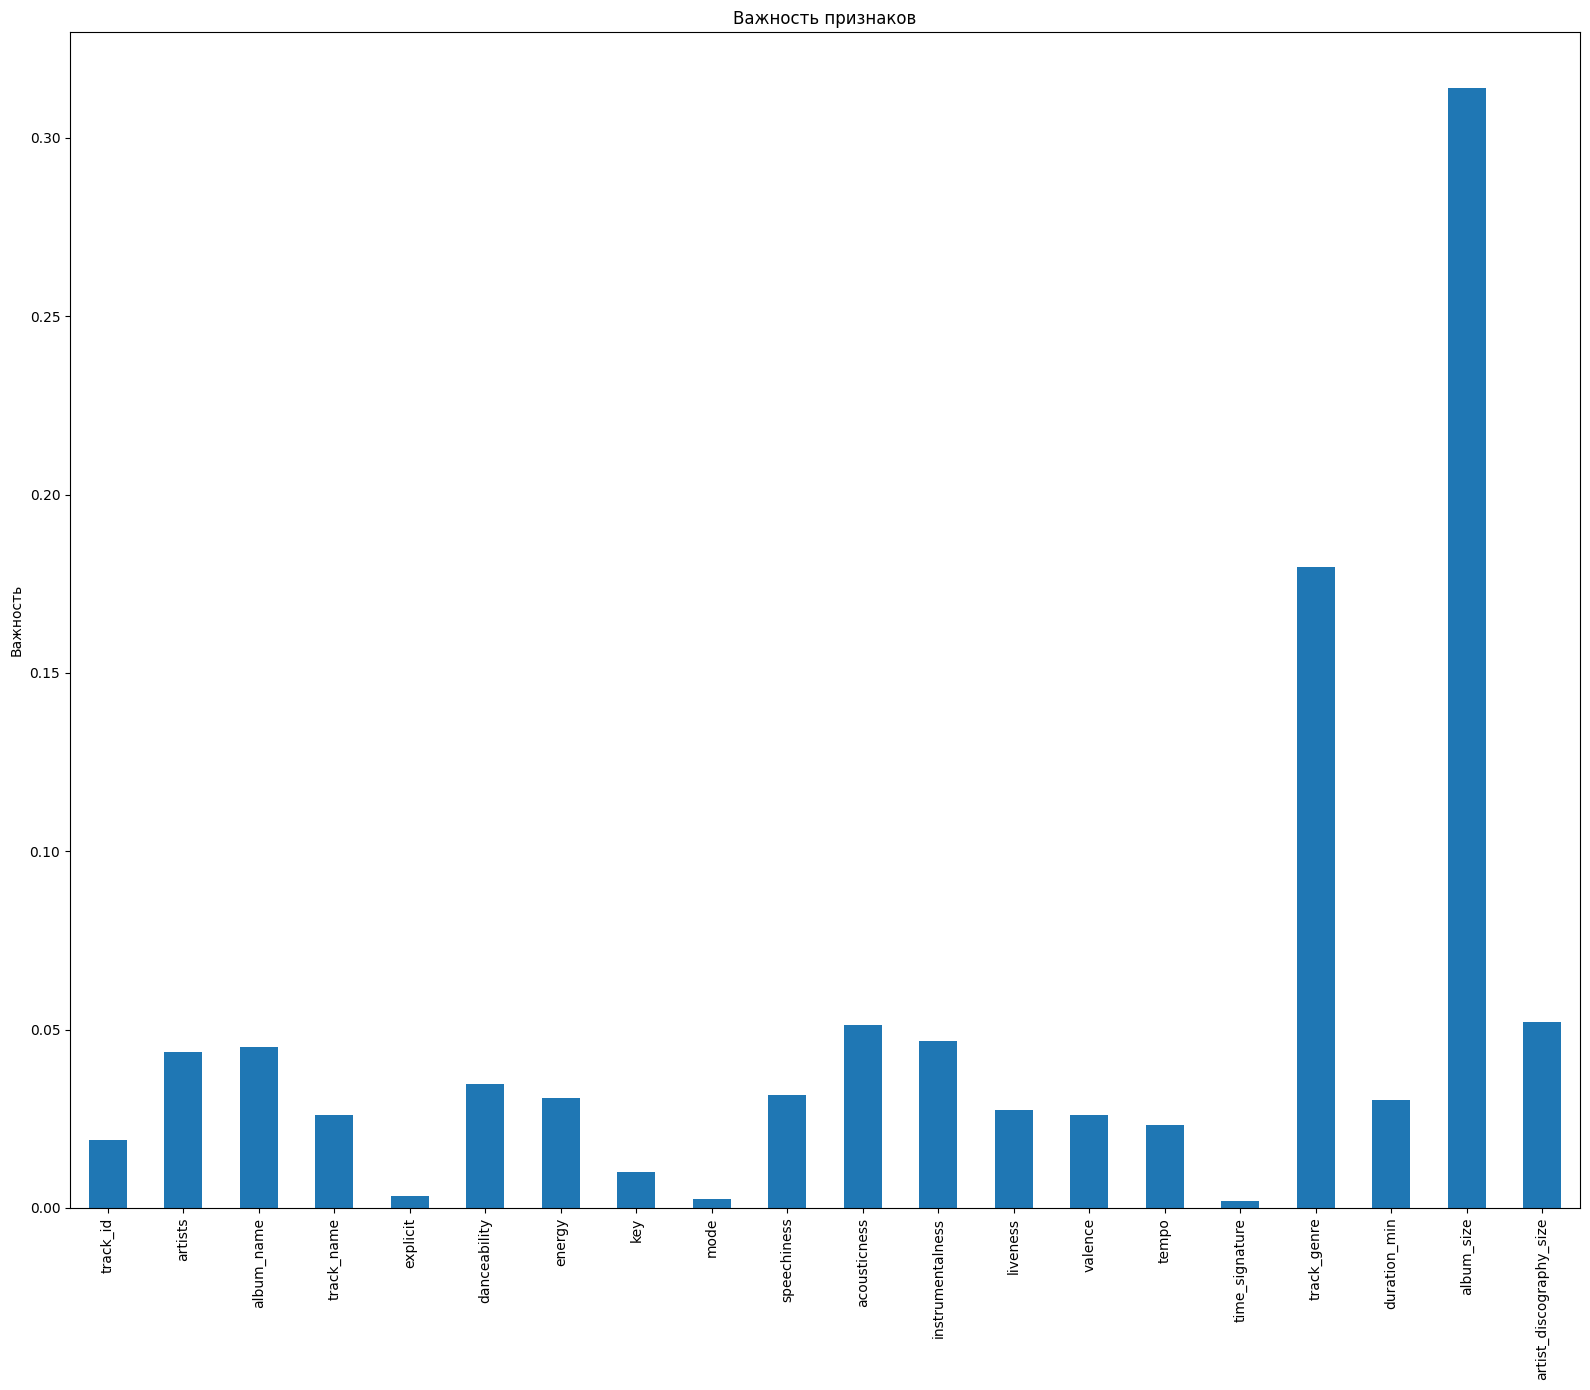

In [135]:

feu_imp = pd.Series(rfregr.feature_importances_, X.columns)

fig, ax = plt.subplots(figsize=(16, 14))
feu_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Самым важным признаком оказался добавленный признак размер альбома, в котором находится песня, причем с отрывом, на втором месте жанр песни

4.2 Gragient Boosting Regressor

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

gbregr = GradientBoostingRegressor(random_state=0)
gbregr.fit(X_train, y_train)

gbr_score = gbregr.score(X_test, y_test)
print(f"Точность модели: {gbr_score:.2f}")

KeyboardInterrupt: 

Показатель намного хуже, чем у предыдущей модели, но из интереса глянем карту признаков

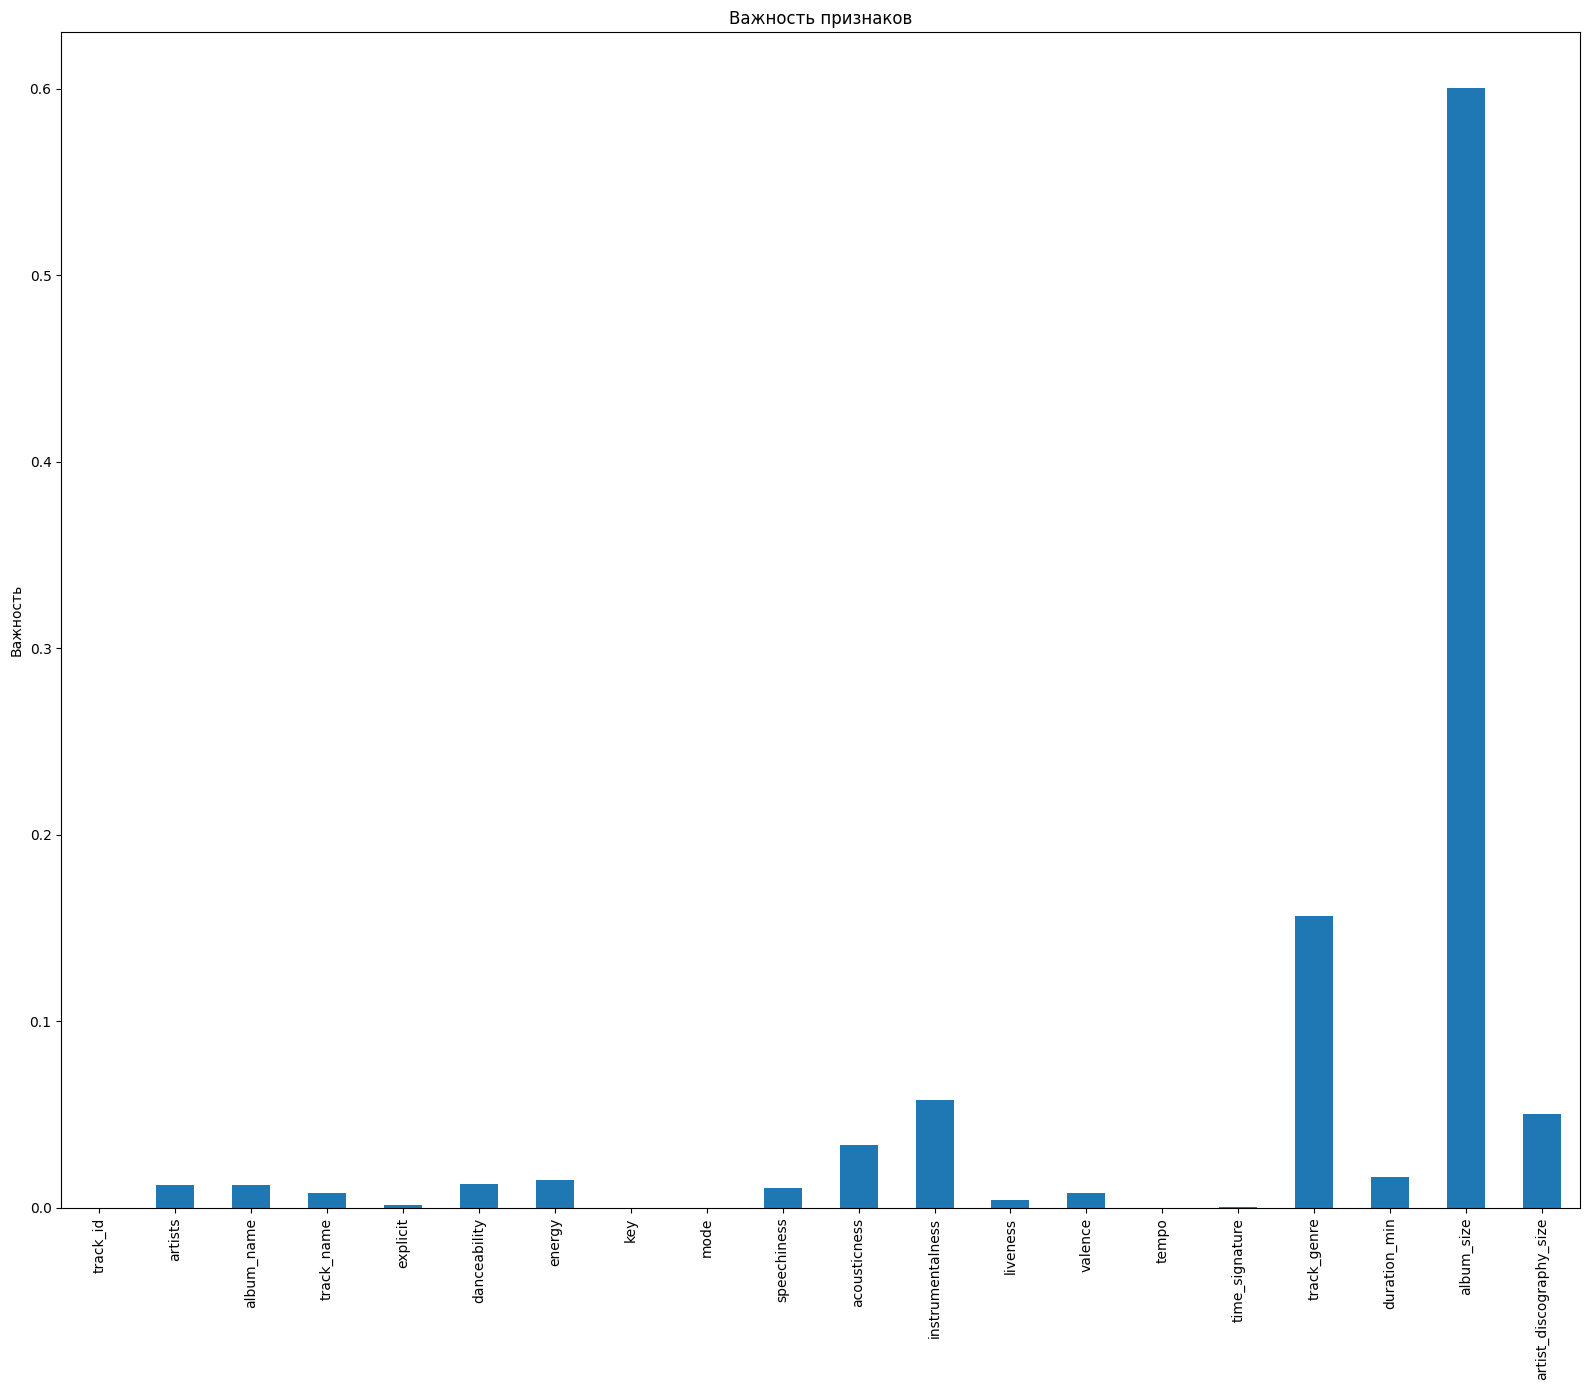

In [137]:

feu_imp = pd.Series(gbregr.feature_importances_, X.columns)

fig, ax = plt.subplots(figsize=(16, 14))
feu_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Как и у предыдщей модели самый важный признак это размер альбома, в котором находится песня, с ещё более явным отрывом, и также на втором месте жанр песни

4.3. Линейная регрессия

In [138]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

l_score = lreg.score(X_test, y_test)
print(f"Точность модели: {rfr_score:.2f}")


Точность модели: 0.77


Точность такая же, как у модели градиентного бустинга: 0.77

4.4 Собственная нейронная сеть

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
input_dim = X_train.shape[1]


model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2, verbose=1)

loss, mae = model.evaluate(X_test, y_test, verbose=0)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Вывод метрик
print(f'Test MAE: {mae:.2f}')
print(f'Test R^2: {r2:.2f}')
print(f'Test MSE: {mse:.2f}')


Epoch 1/30


c:\Users\ADM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6840/6840 ━━━━━━━━━━━━━━━━━━━━ 8s 920us/step - loss: 506.9120 - mae: 17.8870 - val_loss: 357.8462 - val_mae: 15.4536
Epoch 2/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 6s 804us/step - loss: 403.8270 - mae: 16.4182 - val_loss: 357.2495 - val_mae: 15.3933
Epoch 3/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step - loss: 401.3088 - mae: 16.2900 - val_loss: 362.8022 - val_mae: 15.4570
Epoch 4/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step - loss: 405.4656 - mae: 16.3664 - val_loss: 360.2617 - val_mae: 15.4261
Epoch 5/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 6s 802us/step - loss: 399.8487 - mae: 16.2167 - val_loss: 365.6333 - val_mae: 15.5122
Epoch 6/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 6s 804us/step - loss: 401.1250 - mae: 16.2405 - val_loss: 365.0620 - val_mae: 15.5115
Epoch 7/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step - loss: 404.6174 - mae: 16.3107 - val_loss: 356.1270 - val_mae: 15.3152
Epoch 8/30
6840/6840 ━━━━━━━━━━━━━━━━━━━━ 6s 804us/step - loss: 395.3546 - mae: 16.1775 - val_loss: 352.7791 - val_

Значения метрик, полученных от собственной нейросетью нельзя назвать удовлетворительными. 

Из 4 моделей одинаково хорошо справились Random Forest Regressor и Linear Regressor. Предлагаю сделать кросс валидацию на этих двух моделях и в итоге выяснить, какая больше всего подходит для нас.